In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow.keras as keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2024-06-27 20:36:44.159484: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 20:36:44.164196: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 20:36:44.236206: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 20:36:46.095479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plotar perda
    ax1.plot(history.history['loss'], label='Perda de treino')
    ax1.plot(history.history['val_loss'], label='Perda de validação')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Perda')
    ax1.set_title('Perda durante o Treinamento e Validação')
    ax1.legend()

    # Plotar acurácia
    ax2.plot(history.history['accuracy'], label='Acurácia de treino')
    ax2.plot(history.history['val_accuracy'], label='Acurácia de validação')
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Acurácia')
    ax2.set_title('Acurácia durante o Treinamento e Validação')
    ax2.legend()

    plt.show()


In [16]:
dataset = sklearn.datasets.fetch_olivetti_faces(data_home="/home/talvani/TP-RNA/olivetti",shuffle=True)
print(dataset.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [17]:
X = np.array(dataset.images)
Y = np.array(dataset.target)
x = X
y = Y

if X.ndim == 3 and X.shape[1] == 64 and X.shape[2] == 64:
    X = X.reshape(X.shape[0], -1)

lda = LinearDiscriminantAnalysis()
x_train_lda,x_test_lda,y_train_lda,y_test_lda = train_test_split(X,Y, test_size=0.2, random_state=42)
x_train_lda, x_val_lda, y_train_lda, y_val_lda = train_test_split(x_train_lda, y_train_lda, test_size=0.25, random_state=88)  # 0.25 * 0.8 = 0.2
lda.fit(x_train_lda, y_train_lda)

LinearDiscriminantAnalysis()

In [30]:
x= np.array(dataset.images)
y= dataset.target


if x.ndim == 3 and x.shape[1] == 64 and x.shape[2] == 64:
    x = x.reshape(x.shape[0], -1)


x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=88)  # 0.25 * 0.8 = 0.2

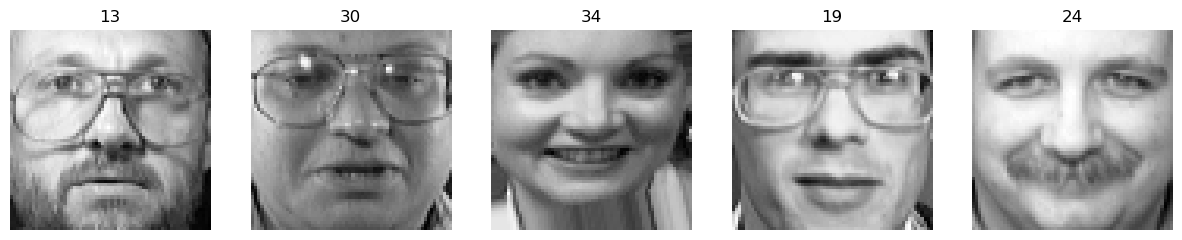

In [19]:
images = dataset.images
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(0,5):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(dataset.target[i]))

In [20]:
print(np.shape(x_train),np.shape(x_test),np.shape(x_val))

(240, 64, 64) (80, 64, 64) (80, 64, 64)


In [21]:
print(np.shape(x_train_lda),np.shape(x_test_lda),np.shape(x_val_lda))

(240, 4096) (80, 4096) (80, 4096)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.0175 - loss: 4.8146 - val_accuracy: 0.0000e+00 - val_loss: 4.0116
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0343 - loss: 3.7790 - val_accuracy: 0.0500 - val_loss: 3.7025
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0393 - loss: 3.6494 - val_accuracy: 0.0375 - val_loss: 3.7358
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0590 - loss: 3.6547 - val_accuracy: 0.0125 - val_loss: 3.6740
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0238 - loss: 3.6417 - val_accuracy: 0.0875 - val_loss: 3.6537
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0420 - loss: 3.6194 - val_accuracy: 0.0500 - val_loss: 3.6661
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0223 - loss: 3.6093 - val_accuracy: 0.0250 - val_loss: 3.6395
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0429 - loss: 3.5789 - val_accuracy: 0.0375 - val_

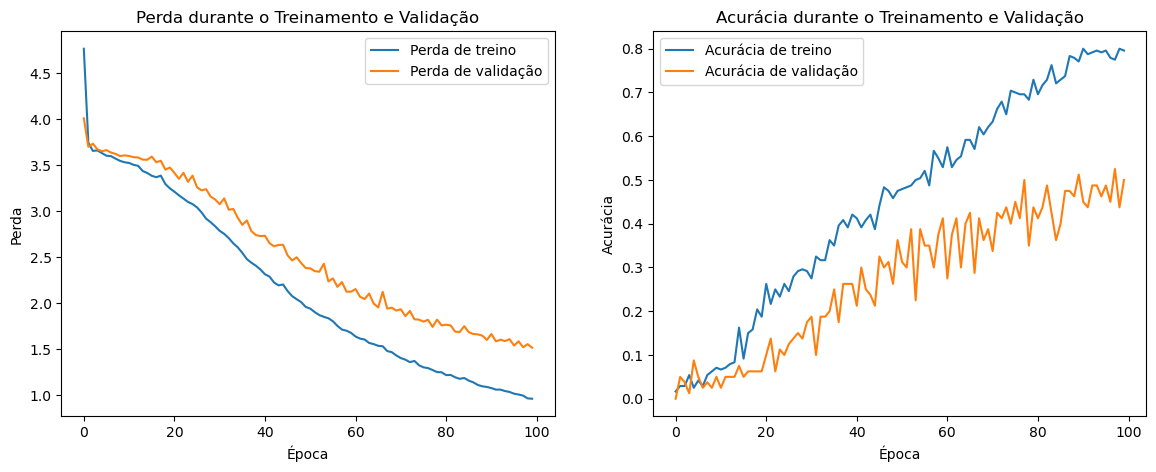

3/3 - 0s - 12ms/step - accuracy: 0.5125 - loss: 1.6235
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0213 - loss: 4.7849 - val_accuracy: 0.0250 - val_loss: 3.8639
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0304 - loss: 3.8123 - val_accuracy: 0.0125 - val_loss: 3.7678
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0473 - loss: 3.6200 - val_accuracy: 0.0625 - val_loss: 3.6154
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0416 - loss: 3.6506 - val_accuracy: 0.0500 - val_loss: 3.6261
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0596 - loss: 3.6258 - val_accuracy: 0.1000 - val_loss: 3.6367
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0777 - loss: 3.6058 - val_accuracy: 0.1375 - val_loss: 3.5702
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0913 - loss: 3.5467 - val_accuracy: 0.0375 - val_loss: 3.5922
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0

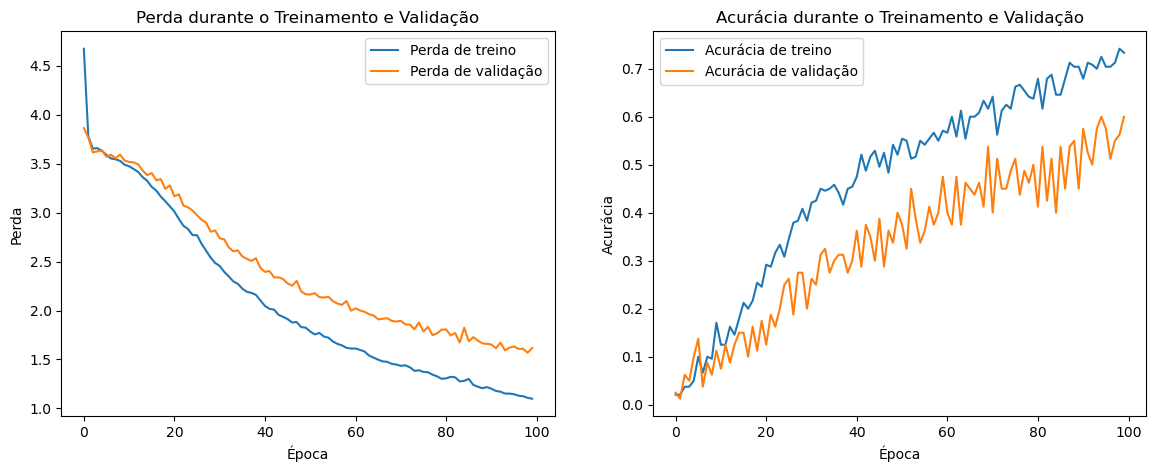

3/3 - 0s - 34ms/step - accuracy: 0.4375 - loss: 1.7353
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.0225 - loss: 4.3771 - val_accuracy: 0.0625 - val_loss: 3.9185
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0257 - loss: 3.8019 - val_accuracy: 0.0625 - val_loss: 3.7377
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0701 - loss: 3.6306 - val_accuracy: 0.0375 - val_loss: 3.6751
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0547 - loss: 3.5703 - val_accuracy: 0.0125 - val_loss: 3.6437
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0336 - loss: 3.5643 - val_accuracy: 0.0750 - val_loss: 3.6245
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0966 - loss: 3.5543 - val_accuracy: 0.0500 - val_loss: 3.6236
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1471 - loss: 3.4725 - val_accuracy: 0.0500 - val_loss: 3.6279
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0

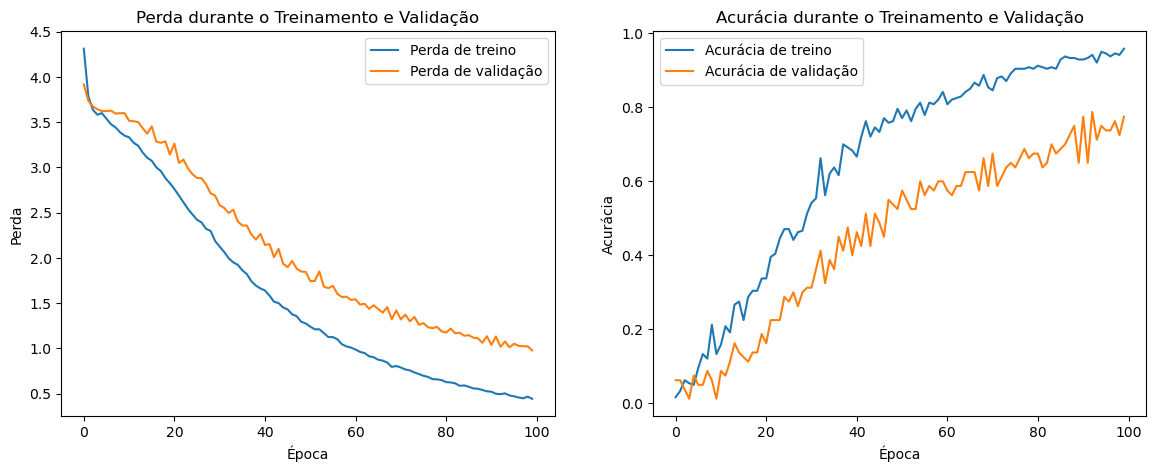

3/3 - 0s - 22ms/step - accuracy: 0.7875 - loss: 0.9749
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0356 - loss: 4.4641 - val_accuracy: 0.0000e+00 - val_loss: 4.1751
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0577 - loss: 3.8684 - val_accuracy: 0.0375 - val_loss: 3.7613
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0266 - loss: 3.6447 - val_accuracy: 0.0625 - val_loss: 3.6562
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0860 - loss: 3.6273 - val_accuracy: 0.0500 - val_loss: 3.6060
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1157 - loss: 3.5788 - val_accuracy: 0.1250 - val_loss: 3.6005
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.1458 - loss: 3.5474 - val_accuracy: 0.1250 - val_loss: 3.5794
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1789 - loss: 3.4949 - val_accuracy: 0.1000 - val_loss: 3.5451
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accurac

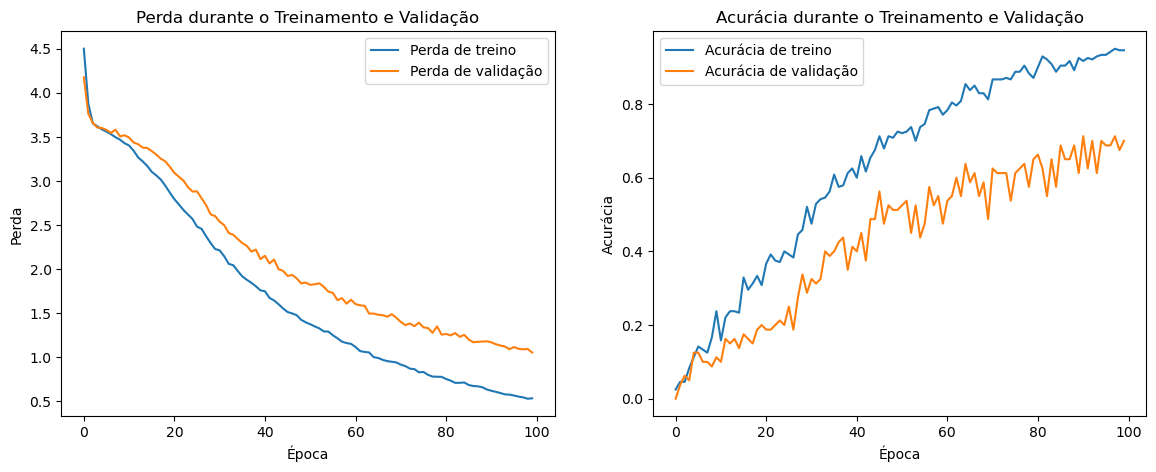

3/3 - 0s - 32ms/step - accuracy: 0.7375 - loss: 1.0540
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.0149 - loss: 4.9474 - val_accuracy: 0.0250 - val_loss: 4.0730
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0372 - loss: 3.7939 - val_accuracy: 0.0125 - val_loss: 3.7708
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0627 - loss: 3.6434 - val_accuracy: 0.0500 - val_loss: 3.6594
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0403 - loss: 3.6530 - val_accuracy: 0.0250 - val_loss: 3.6948
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0407 - loss: 3.6467 - val_accuracy: 0.0375 - val_loss: 3.6921
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0903 - loss: 3.6049 - val_accuracy: 0.0750 - val_loss: 3.6592
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1032 - loss: 3.6043 - val_accuracy: 0.0750 - val_loss: 3.6723
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0

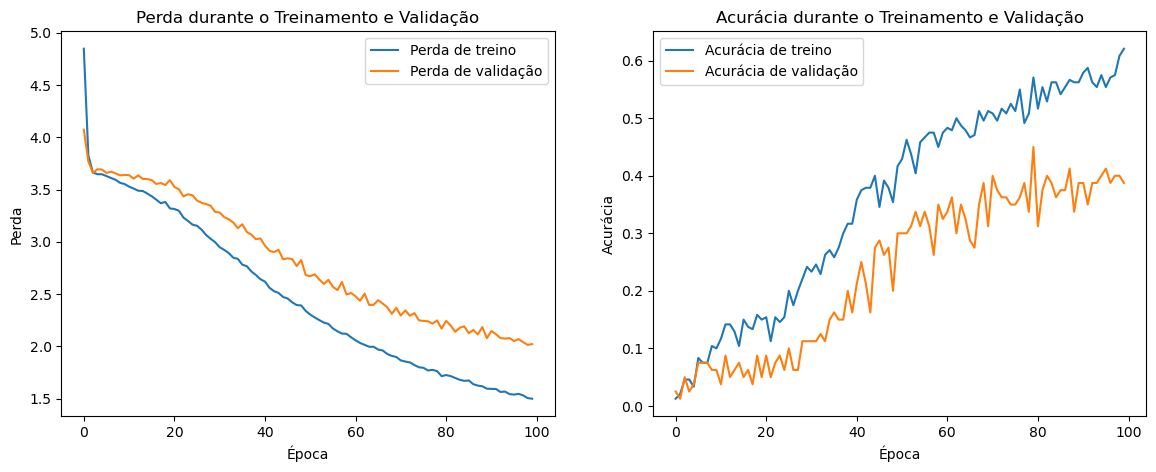

3/3 - 0s - 12ms/step - accuracy: 0.3500 - loss: 2.1069


In [27]:

LDA_results = []

for i in range(5):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(40)
    ])

    model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

    history = model.fit(x_train_lda, y_train_lda, epochs=100, validation_data=(x_val_lda,y_val_lda))

    plot_history(history)
    test_loss, test_acc = model.evaluate(x_test_lda, y_test_lda, verbose=2)

    LDA_results.append((test_acc,test_loss))


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.0152 - loss: 4.6884 - val_accuracy: 0.0250 - val_loss: 4.2046
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0243 - loss: 3.9012 - val_accuracy: 0.0125 - val_loss: 3.7318
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0883 - loss: 3.6787 - val_accuracy: 0.0000e+00 - val_loss: 3.7113
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0161 - loss: 3.6630 - val_accuracy: 0.0750 - val_loss: 3.6759
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0715 - loss: 3.6073 - val_accuracy: 0.0250 - val_loss: 3.6800
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0344 - loss: 3.6097 - val_accuracy: 0.0625 - val_loss: 3.6565
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0723 - loss: 3.5919 - val_accuracy: 0.0250 - val_loss: 3.6712
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1012 - loss: 3.5324 - val_accuracy: 0.0375 - val_l

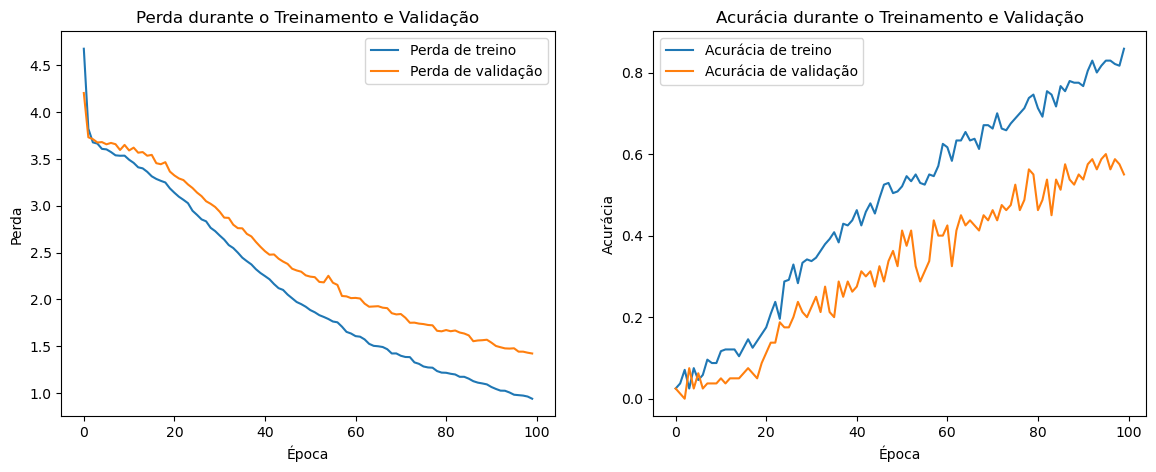

3/3 - 0s - 15ms/step - accuracy: 0.5375 - loss: 1.5557
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.0185 - loss: 4.4633 - val_accuracy: 0.0125 - val_loss: 3.8599
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0511 - loss: 3.7750 - val_accuracy: 0.0250 - val_loss: 3.6670
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0128 - loss: 3.6398 - val_accuracy: 0.0500 - val_loss: 3.6455
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0392 - loss: 3.6321 - val_accuracy: 0.0500 - val_loss: 3.6240
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0473 - loss: 3.6353 - val_accuracy: 0.0625 - val_loss: 3.6306
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0587 - loss: 3.5902 - val_accuracy: 0.0125 - val_loss: 3.6172
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0546 - loss: 3.6176 - val_accuracy: 0.1000 - val_loss: 3.6120
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0

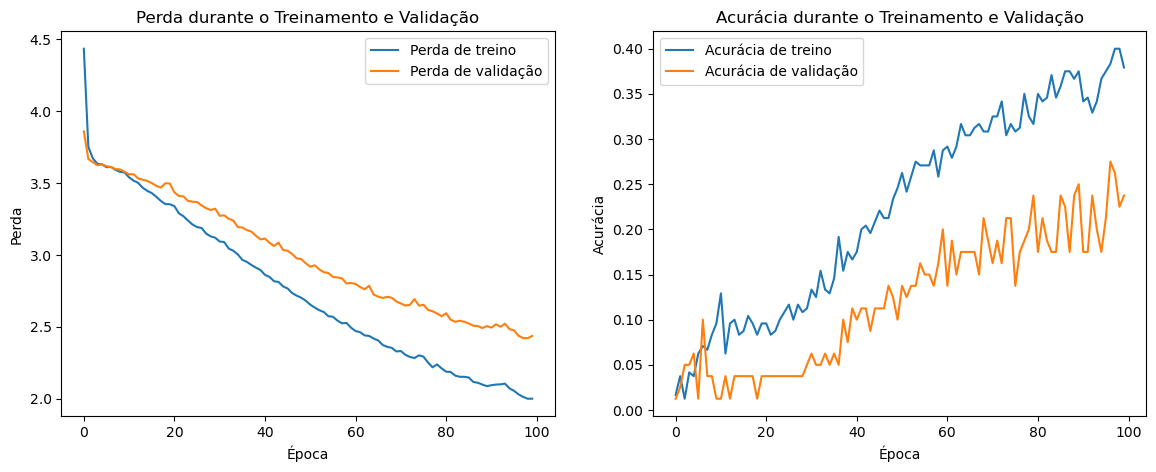

3/3 - 0s - 12ms/step - accuracy: 0.1625 - loss: 2.4959
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0226 - loss: 4.8781 - val_accuracy: 0.0375 - val_loss: 4.0150
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0297 - loss: 3.8958 - val_accuracy: 0.0125 - val_loss: 3.7018
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0180 - loss: 3.6515 - val_accuracy: 0.0375 - val_loss: 3.6813
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0399 - loss: 3.6593 - val_accuracy: 0.0375 - val_loss: 3.6731
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0277 - loss: 3.6478 - val_accuracy: 0.0375 - val_loss: 3.6723
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0620 - loss: 3.6492 - val_accuracy: 0.0125 - val_loss: 3.6785
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0421 - loss: 3.6359 - val_accuracy: 0.0375 - val_loss: 3.6712
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0

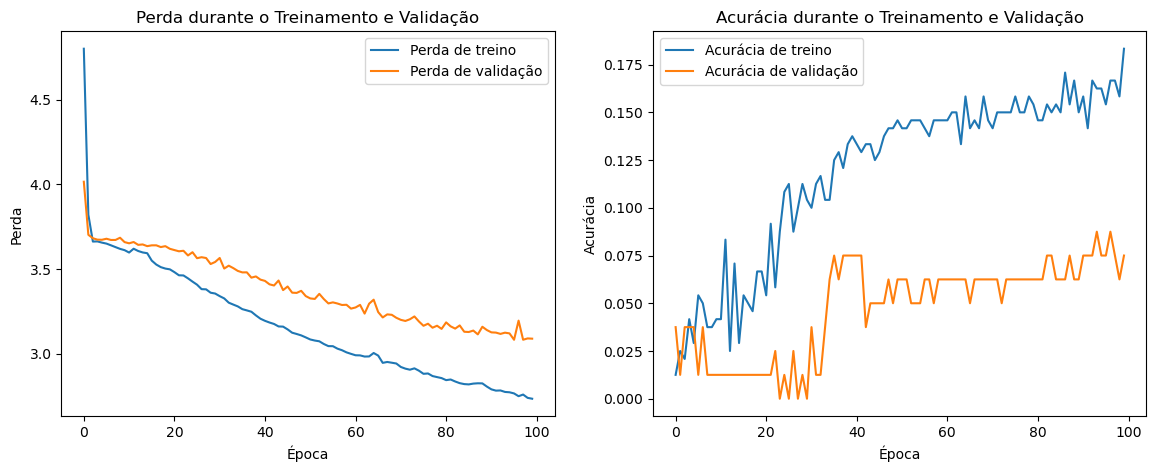

3/3 - 0s - 20ms/step - accuracy: 0.0875 - loss: 2.9935
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.0267 - loss: 4.4755 - val_accuracy: 0.0500 - val_loss: 4.0014
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0203 - loss: 3.9026 - val_accuracy: 0.0125 - val_loss: 3.7085
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0330 - loss: 3.6565 - val_accuracy: 0.0375 - val_loss: 3.6288
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0455 - loss: 3.6351 - val_accuracy: 0.0250 - val_loss: 3.6068
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0562 - loss: 3.6221 - val_accuracy: 0.0250 - val_loss: 3.6365
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0498 - loss: 3.5737 - val_accuracy: 0.0500 - val_loss: 3.5981
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0400 - loss: 3.6200 - val_accuracy: 0.0000e+00 - val_loss: 3.6447
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accurac

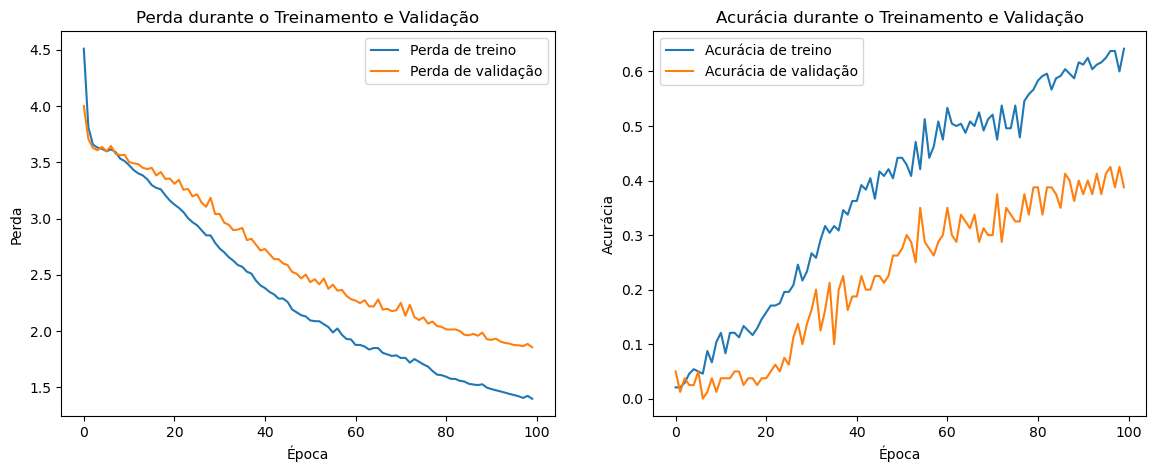

3/3 - 0s - 26ms/step - accuracy: 0.3750 - loss: 2.1358
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.0199 - loss: 4.8334 - val_accuracy: 0.0125 - val_loss: 3.9900
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0297 - loss: 3.7369 - val_accuracy: 0.0375 - val_loss: 3.6973
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0316 - loss: 3.6665 - val_accuracy: 0.0250 - val_loss: 3.6979
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0500 - loss: 3.6775 - val_accuracy: 0.0125 - val_loss: 3.6721
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0363 - loss: 3.6593 - val_accuracy: 0.0125 - val_loss: 3.6825
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0369 - loss: 3.6490 - val_accuracy: 0.0250 - val_loss: 3.6577
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0276 - loss: 3.6427 - val_accuracy: 0.0375 - val_loss: 3.6573
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0

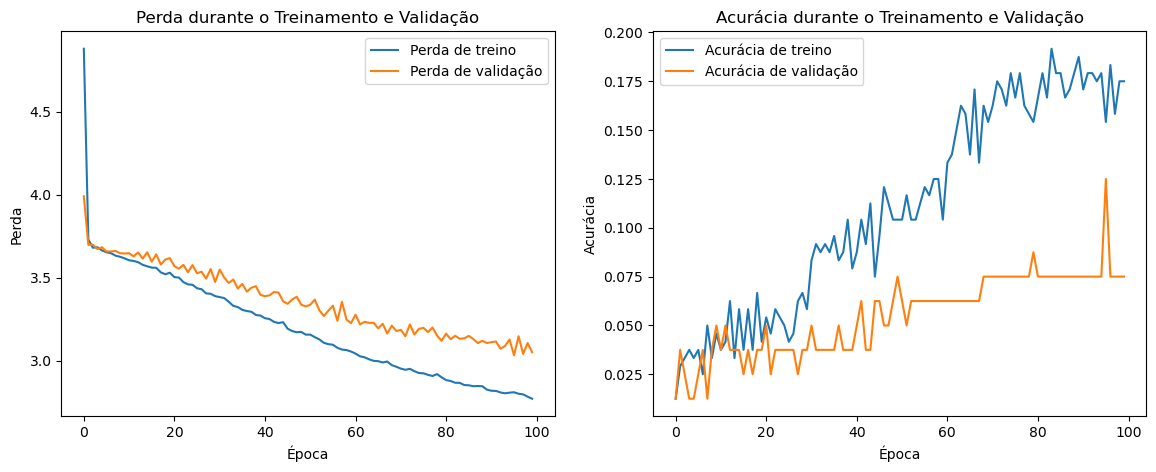

3/3 - 0s - 17ms/step - accuracy: 0.0750 - loss: 3.2098


In [32]:

no_LDA_results = []



for i in range(5):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(40)
    ])

    model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val,y_val))

    plot_history(history)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

    no_LDA_results.append((test_acc,test_loss))


In [39]:
sum_LDA = 0
sum_no_LDA = 0


for i in range(len(LDA_results)):
    sum_LDA += LDA_results[i][0]
    sum_no_LDA += no_LDA_results[i][0]
mean_LDA = sum_LDA/len(LDA_results)
mean_no_LDA = sum_no_LDA/len(LDA_results)
print(mean_LDA)
print(mean_no_LDA)

0.5650000035762787
0.2475000038743019


10
10


TypeError: Invalid shape (4096,) for image data

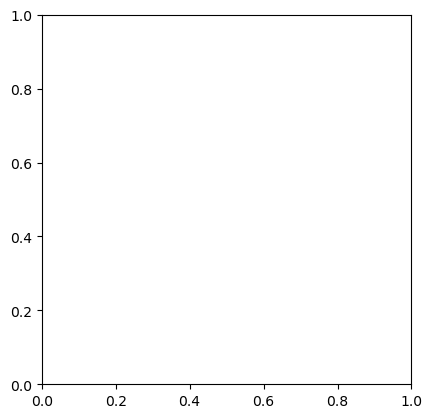

In [45]:
print(np.argmax(model(x_train)[0]))
print(y_train[0])
plt.imshow(x_train[0])

TypeError: Invalid shape (4096,) for image data

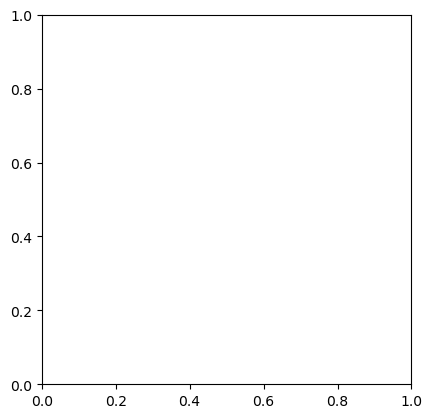

In [46]:
x_test = np.array(x_test)
y_test = np.array(y_test)

predicts = model(x_test)




for i in range(0,len(x_test)):
    predicted_class = np.argmax(predicts[i])
    confidence = np.max(predicts[i])
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})\n True Value: {y_test[i]}")
    plt.show()